# 1. Import libraries

Import all necessary libraries

In [1]:
#For data handling and EDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#For Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold
from mlxtend.feature_selection import ColumnSelector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif

#For model creation
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

#For evaluating model performance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# 2. Import dataset

Importing the `train.csv` and `test.csv` file

In [2]:
df = pd.read_csv("//kaggle/input/demo89/train.csv/train.csv")
test = pd.read_csv("/kaggle/input/demo89/test.csv/test.csv")
df.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


# 3. Key Statistics and Insights

In [3]:
df.shape

(13636, 15)

In [4]:
df.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [6]:
df.count()

ID                   13636
RecipeNumber         13636
RecipeCode           13636
RecipeName           13636
CommentID            13636
UserID               13636
UserName             13636
UserReputation       13636
CreationTimestamp    13636
ReplyCount           13636
ThumbsUpCount        13636
ThumbsDownCount      13636
Rating               13636
BestScore            13636
Recipe_Review        13634
dtype: int64

In [7]:
df.isnull().any()

ID                   False
RecipeNumber         False
RecipeCode           False
RecipeName           False
CommentID            False
UserID               False
UserName             False
UserReputation       False
CreationTimestamp    False
ReplyCount           False
ThumbsUpCount        False
ThumbsDownCount      False
Rating               False
BestScore            False
Recipe_Review         True
dtype: bool

In [8]:
df.mode().iloc[0][1:]   

RecipeNumber                                   3.0
RecipeCode                                  2832.0
RecipeName                       Cheeseburger Soup
CommentID              sp_aUSaElGf_100276_c_106707
UserID               u_1oKVZoIOMWJ2j7TA7py2BIbf1mm
UserName                                    mjlouk
UserReputation                                 1.0
CreationTimestamp                     1622648873.0
ReplyCount                                     0.0
ThumbsUpCount                                  0.0
ThumbsDownCount                                0.0
Rating                                         5.0
BestScore                                    100.0
Recipe_Review                           Delicious!
Name: 0, dtype: object

Checking for data imbalance in dataframe 

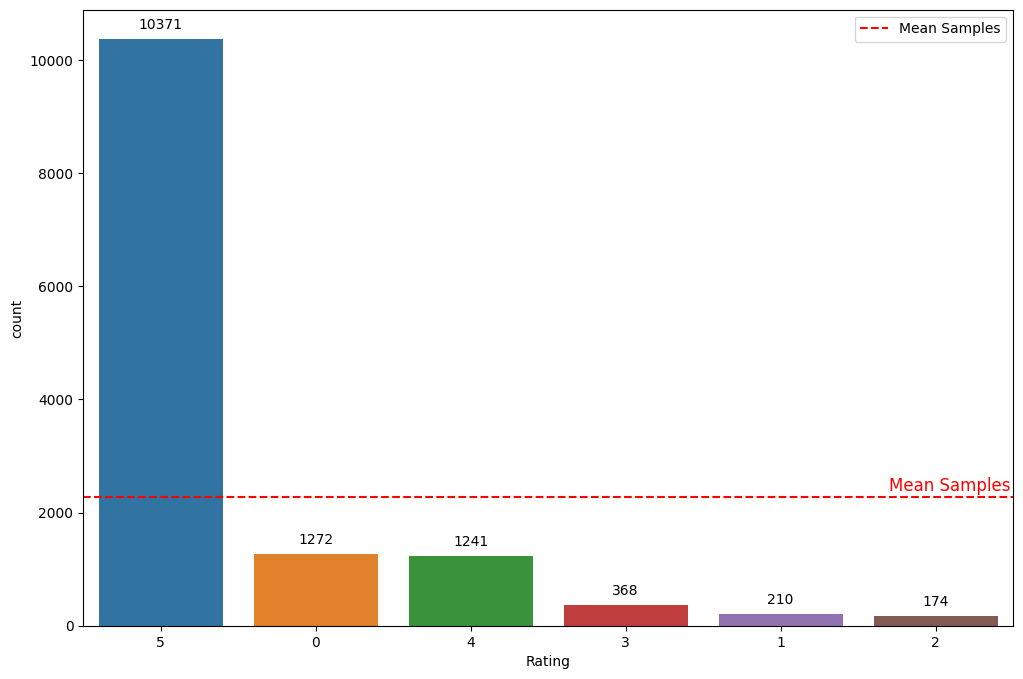

In [9]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index)

mean_samples = df['Rating'].value_counts().mean()

plt.axhline(mean_samples, color='r', linestyle='--', label='Mean Samples')

plt.text(4.7, mean_samples + 120, 'Mean Samples', color='r', fontsize=12)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.legend()  
plt.show()

We can observe from the above bar chart that Rating 5 is the **majority class** and Ratings 0,1,2,3 and 4 are the **minority classes.**

# 4. Preprocessing

For preprocessing, applying `StandardScaler()` lead to a decrease in accuracy and hence it was not used. The 2 NULL values in `CreationTimestamp` were dropped.

In [10]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer

# numerical_cols = ["UserReputation", "ReplyCount", "ThumbsUpCount", "ThumbsDownCount"]
# categorical_cols = ['CreationTimestamp']
# other_cols = [col for col in df.columns if col not in numerical_cols and col not in categorical_cols]

# # Create pipeline for numerical columns
# numerical_pipeline = Pipeline([
#     ('scaler', StandardScaler())  # Scale the numerical features
# ])

# # Create transformer for categorical columns
# preprocessor = ColumnTransformer([
#     ('numerical_transformer', numerical_pipeline, numerical_cols),
#     ('categorical_imputer', SimpleImputer(strategy='most_frequent'), categorical_cols)],
# remainder = 'passthrough')

# transformed_data = preprocessor.fit_transform(df)

# # Convert transformed data back to DataFrame

# df = pd.DataFrame(transformed_data, columns = numerical_cols + categorical_cols + other_cols)
# df

# 5. Feature Engineering

`CreationTimestamp` had UNIX timestamps which were converted to datetime format and created 4 new columns - **Hour, Year Month** and **Day**

In [11]:
df['CreationTimestamp'] = pd.to_datetime(df['CreationTimestamp'], unit='s')
df['Hour'] = df['CreationTimestamp'].dt.hour
df['Year'] = df['CreationTimestamp'].dt.year
df['Month'] = df['CreationTimestamp'].dt.month
df['Day'] = df['CreationTimestamp'].dt.day
df = df.drop(['CreationTimestamp'], axis = 1)

The same has been repeated for the test dataset

In [12]:
test = test.drop(columns=["RecipeName", "Recipe_Review", "UserID", "CommentID", "UserName"])
test['CreationTimestamp'] = pd.to_datetime(test['CreationTimestamp'], unit='s')
test['CreationTimestamp'].fillna(method='ffill', inplace=True)
test['Hour'] = test['CreationTimestamp'].dt.hour
test['Year'] = test['CreationTimestamp'].dt.year
test['Month'] = test['CreationTimestamp'].dt.month
test['Day'] = test['CreationTimestamp'].dt.day
test = test.drop(['CreationTimestamp'], axis = 1)
test = test.dropna()

# 6. Feature Selection

First I removed all columns with `dtype = object` so that I can do Feature Selection

In [13]:
X = df.drop(columns=["Rating", "RecipeName", "Recipe_Review", "UserID", "CommentID", "UserName"])
y = df["Rating"]

I will be using `f_classif` score function in `SelectKBest` for selecting the best features. 

Feature 0 : 11.499
Feature 1 : 9.042
Feature 2 : 2.619
Feature 3 : 0.902
Feature 4 : 38.688
Feature 5 : 9.855
Feature 6 : 127.175
Feature 7 : 8.332
Feature 8 : 3.863
Feature 9 : 5.932
Feature 10 : 1.935
Feature 11 : 7.666


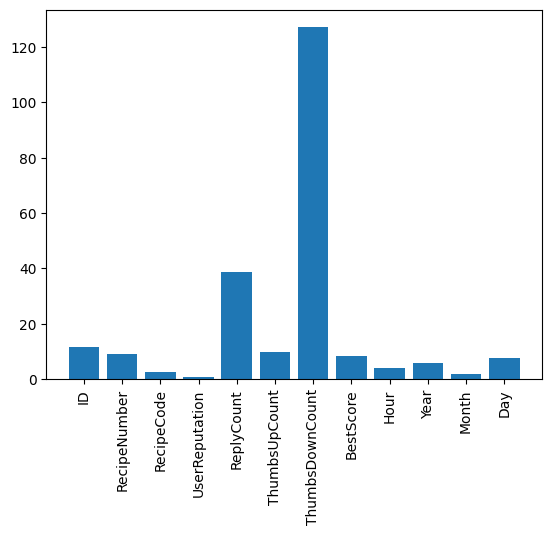

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)


Kbest_classif = SelectKBest(score_func=f_classif)
Kbest_classif.fit(X_train, y_train)

# what are scores for the features
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

plt.bar([X_train.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

Since `UserReputation`, `Month`, `Hour` and `RecipeCode` have very less scores, I will be dropping them.

In [15]:
X = X.drop(["Month", "Hour", "UserReputation", "RecipeCode"], axis = 1) 
test = test.drop(["Month", "Hour", "UserReputation", "RecipeCode"], axis = 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle = True, random_state=42)
X_train

,ID,RecipeNumber,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Year,Day
7291,397,2,0,0,0,100,2021,3
9254,128,16,0,1,0,193,2021,3
5299,215,19,0,0,0,100,2021,3
11252,143,64,0,0,0,100,2021,3
13605,116,89,0,0,0,100,2021,3
...,...,...,...,...,...,...,...,...
9329,92,22,0,0,0,100,2021,3
9452,146,6,0,0,0,100,2021,3
833,24,99,0,2,3,153,2021,7
1733,54,15,0,0,0,100,2021,3


# 5. EDA

In [17]:
print(f"X_train : {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train : {y_train.shape[0]} rows and 1 column")
print(f"X_train : {X_test.shape[0]} rows and {X_test.shape[1]} columns")
print(f"y_test : {y_test.shape[0]} rows and 1 column")

X_train : 10908 rows and 8 columns
y_train : 10908 rows and 1 column
X_train : 2728 rows and 8 columns
y_test : 2728 rows and 1 column


Below I am plotting a correlation heatmap to see if there are any significant correlations b/w the target variable and feature variables.

<Axes: >

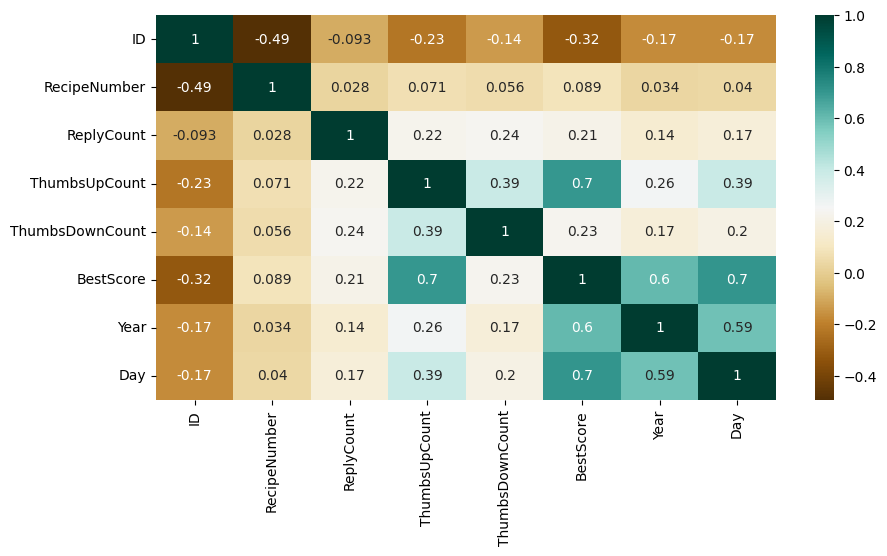

In [18]:
plt.figure(figsize=(10,5))
c= X_train.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

A high correlation (>0.5) is observed b/w:

- BestScore and ThumbsUpCount
- BestScore and Day
- BestScore and Year

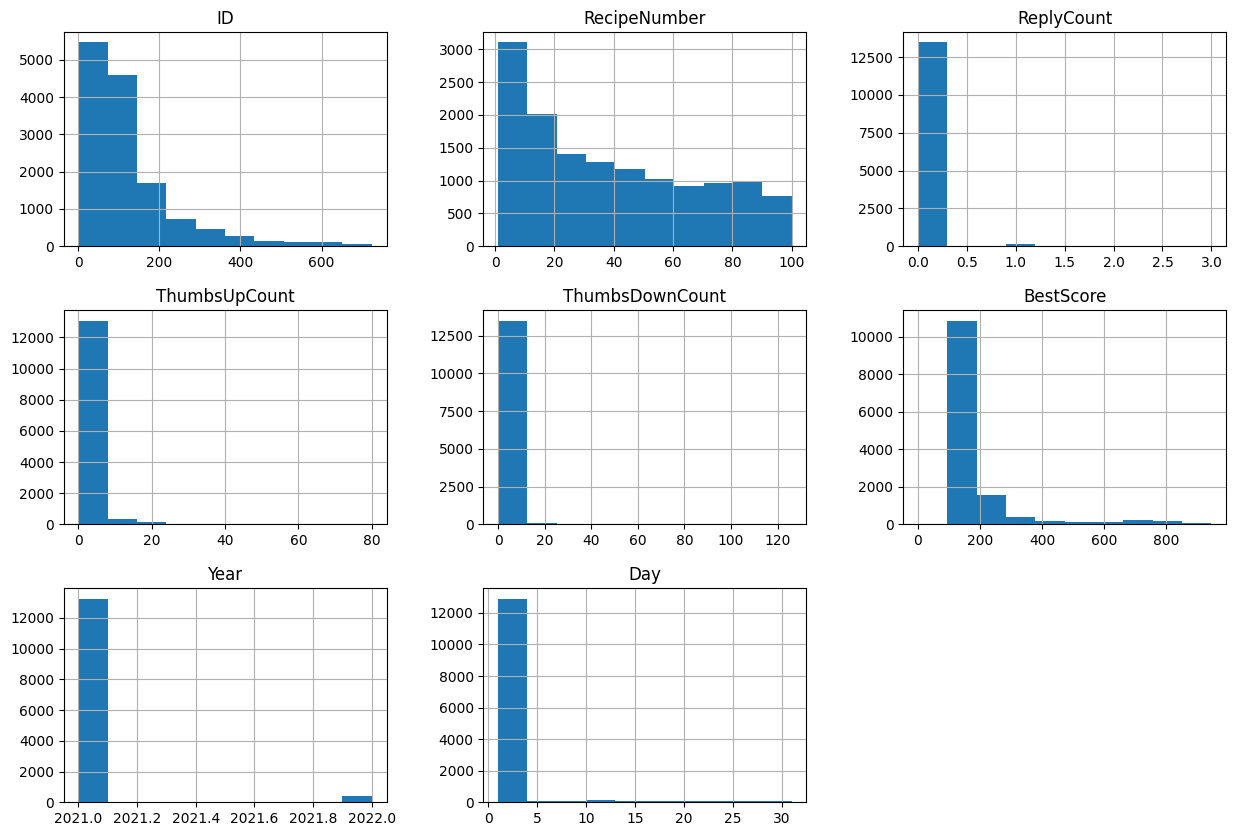

In [19]:
X.hist(figsize=(15,10));

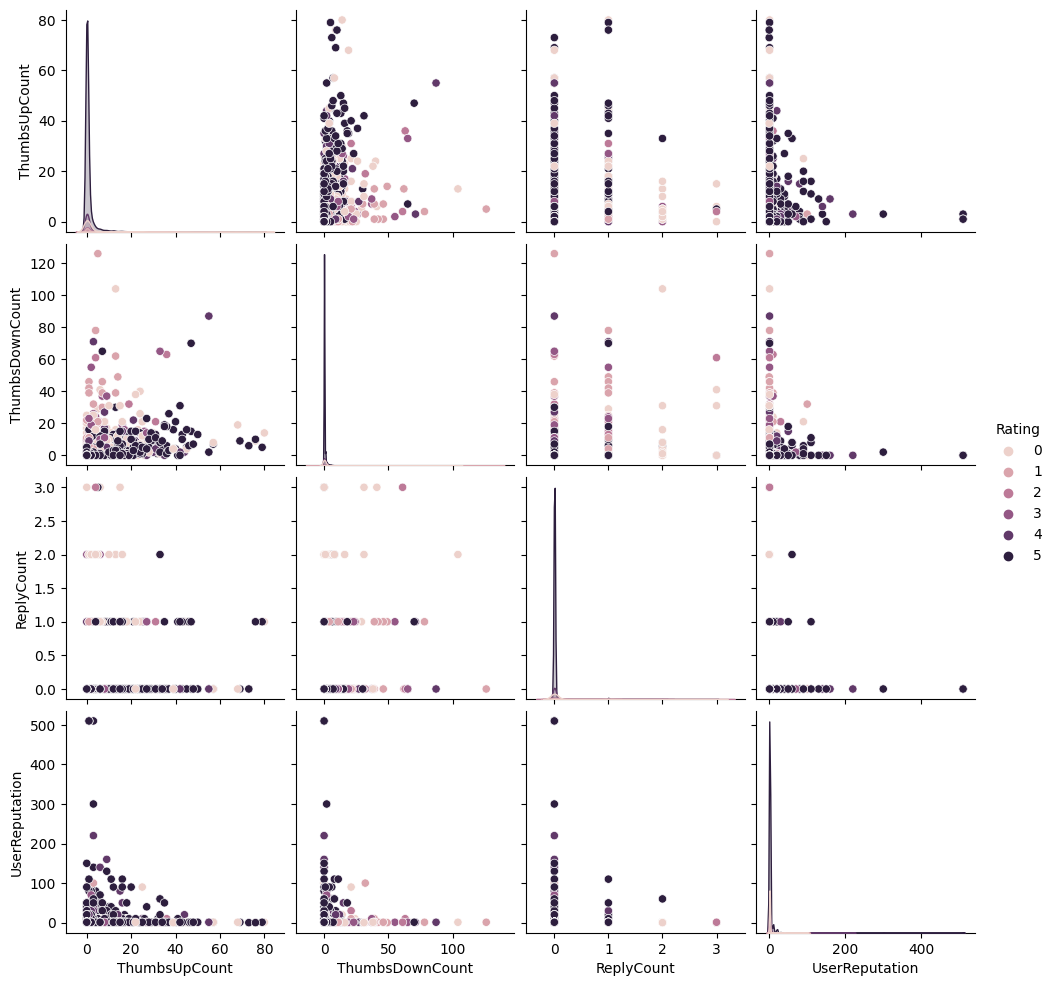

In [20]:
sns.pairplot(data=df[["ThumbsUpCount","ThumbsDownCount","ReplyCount", "UserReputation", "Rating"]],
             hue='Rating', dropna=True)

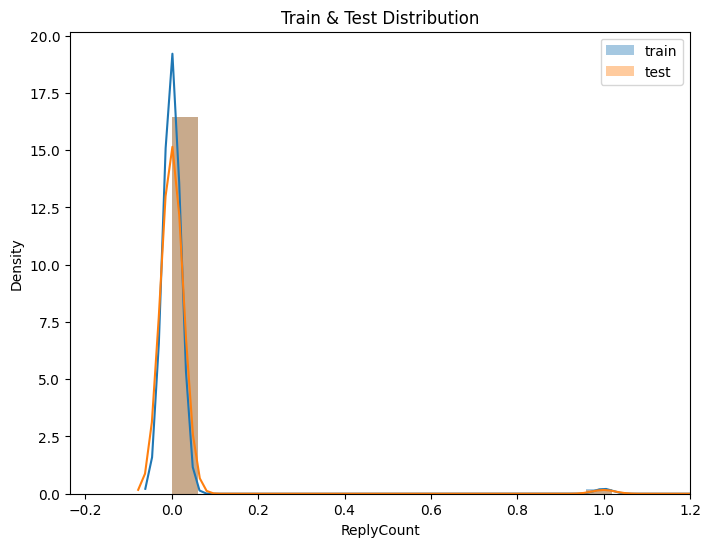

In [21]:
sns.distplot(df['ReplyCount'], label='train')
sns.distplot(test['ReplyCount'], label='test')
plt.title('Train & Test Distribution')
plt.xlim(right=1.2)
plt.legend()
plt.show()

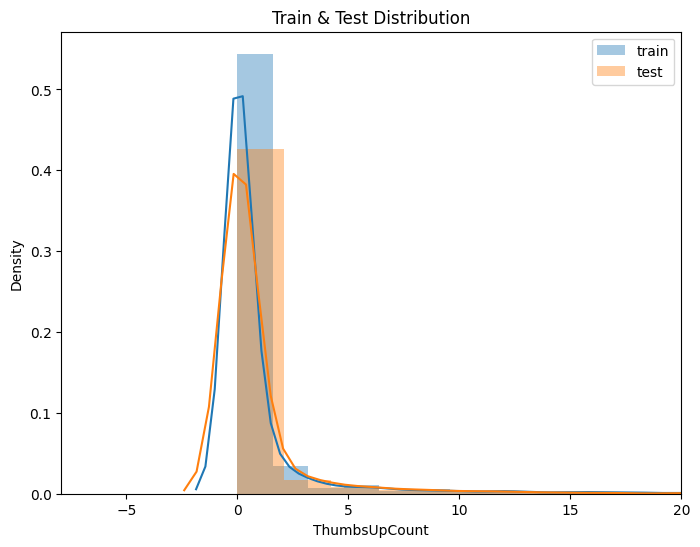

In [22]:
sns.distplot(df['ThumbsUpCount'], label='train')
sns.distplot(test['ThumbsUpCount'], label='test')
plt.title('Train & Test Distribution')
plt.xlim(right=20)
plt.legend()
plt.show()

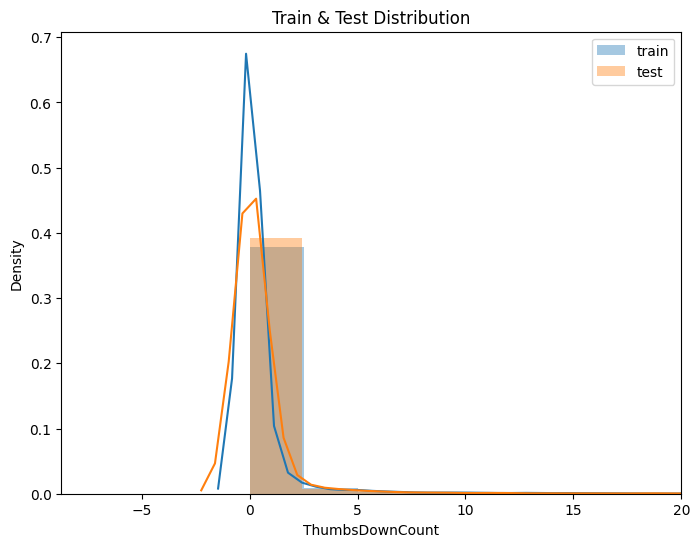

In [23]:
sns.distplot(df['ThumbsDownCount'], label='train')
sns.distplot(test['ThumbsDownCount'], label='test')
plt.title('Train & Test Distribution')
plt.xlim(right=20)
plt.legend()
plt.show()

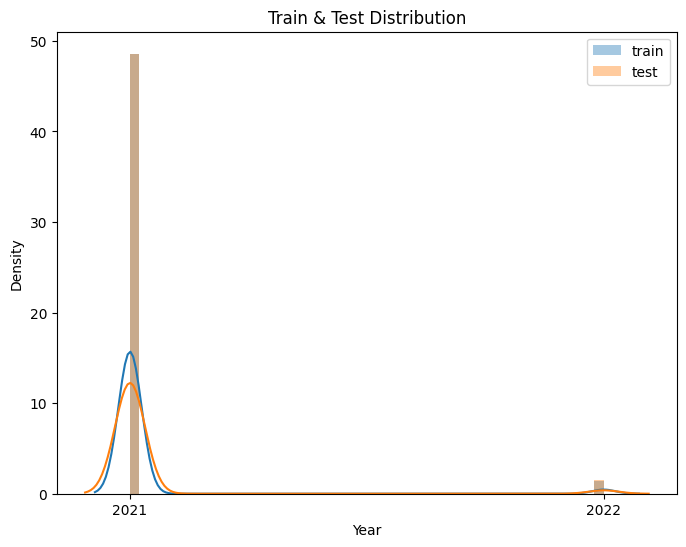

In [24]:
sns.distplot(df['Year'], label='train')
sns.distplot(test['Year'], label='test')
plt.title('Train & Test Distribution')
plt.xticks([2021,2022])
plt.legend()
plt.show()

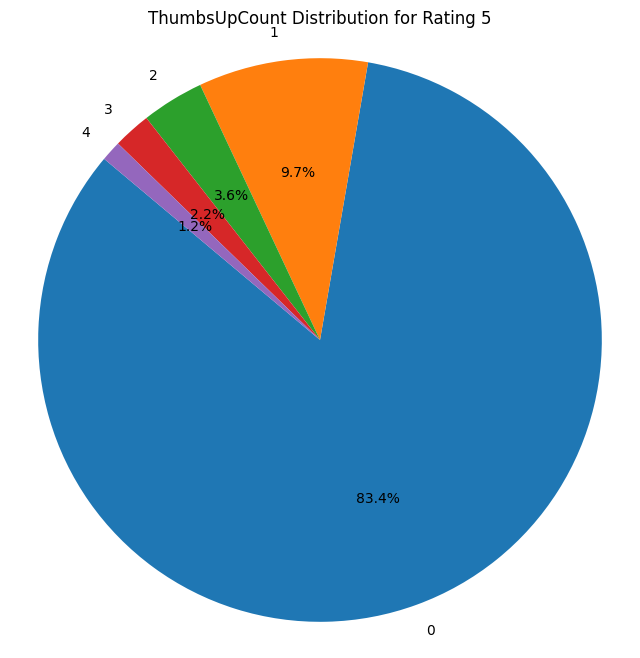

In [25]:
rating5_df = df[df['Rating'] == 5]
thumbs_up_counts = rating5_df['ThumbsUpCount'].value_counts()
filtered_counts = thumbs_up_counts[thumbs_up_counts >= 100]

plt.figure(figsize=(8, 8))
plt.pie(filtered_counts.values, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('ThumbsUpCount Distribution for Rating 5')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

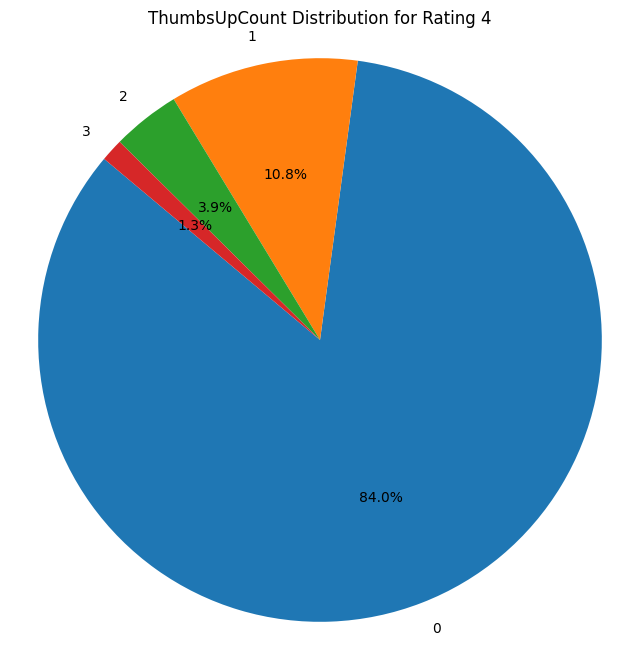

In [26]:
rating4_df = df[df['Rating'] == 4]
thumbs_up_counts = rating4_df['ThumbsUpCount'].value_counts()
filtered_counts = thumbs_up_counts[thumbs_up_counts >= 15]

plt.figure(figsize=(8, 8))
plt.pie(filtered_counts.values, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('ThumbsUpCount Distribution for Rating 4')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

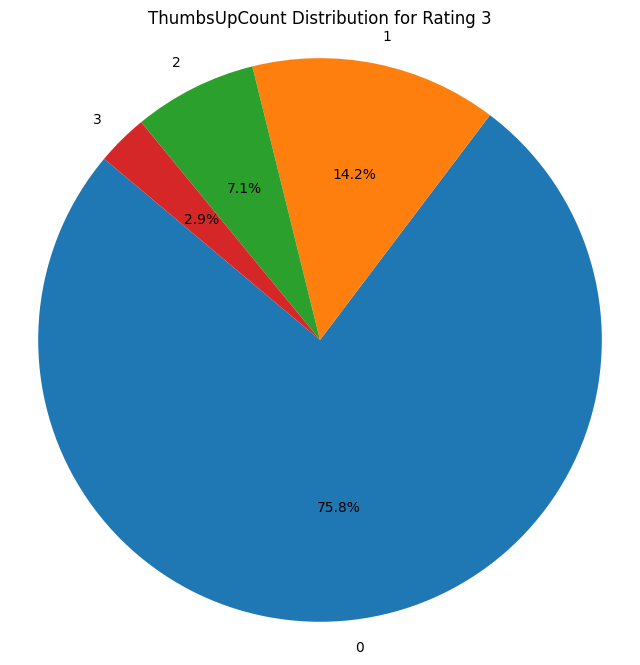

In [27]:
rating3_df = df[df['Rating'] == 3]
thumbs_up_counts = rating3_df['ThumbsUpCount'].value_counts()
filtered_counts = thumbs_up_counts[thumbs_up_counts >= 10]

plt.figure(figsize=(8, 8))
plt.pie(filtered_counts.values, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('ThumbsUpCount Distribution for Rating 3')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

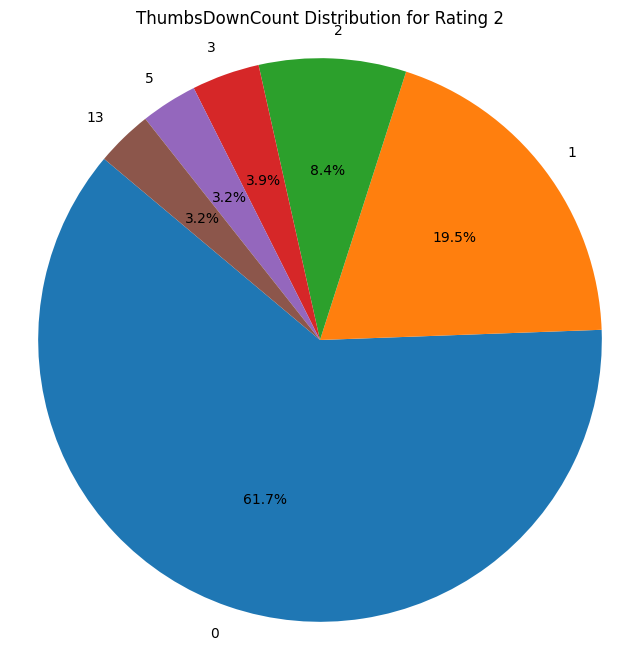

In [28]:
rating2_df = df[df['Rating'] == 2]
thumbs_down_counts = rating2_df['ThumbsDownCount'].value_counts()
filtered_counts = thumbs_down_counts[thumbs_down_counts >= 5]

plt.figure(figsize=(8, 8))
plt.pie(filtered_counts.values, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('ThumbsDownCount Distribution for Rating 2')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

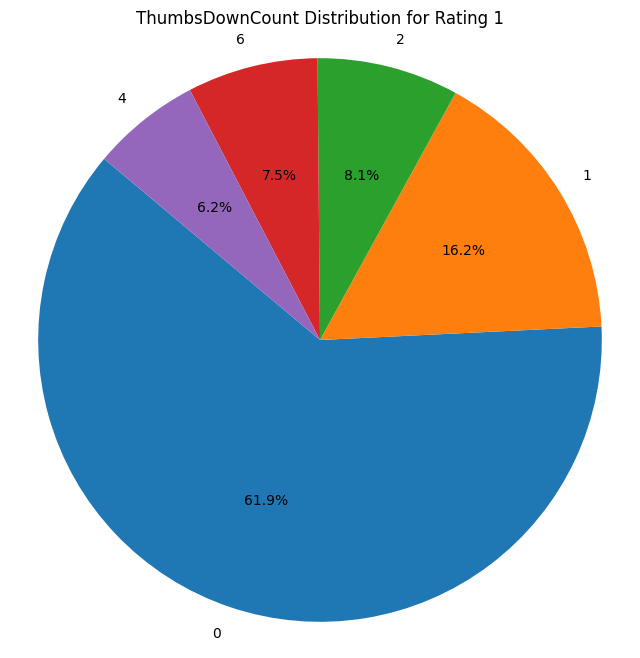

In [29]:
rating1_df = df[df['Rating'] == 1]
thumbs_down_counts = rating1_df['ThumbsDownCount'].value_counts()
filtered_counts = thumbs_down_counts[thumbs_down_counts >= 10]

plt.figure(figsize=(8, 8))
plt.pie(filtered_counts.values, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('ThumbsDownCount Distribution for Rating 1')
plt.axis('equal') 
plt.show()

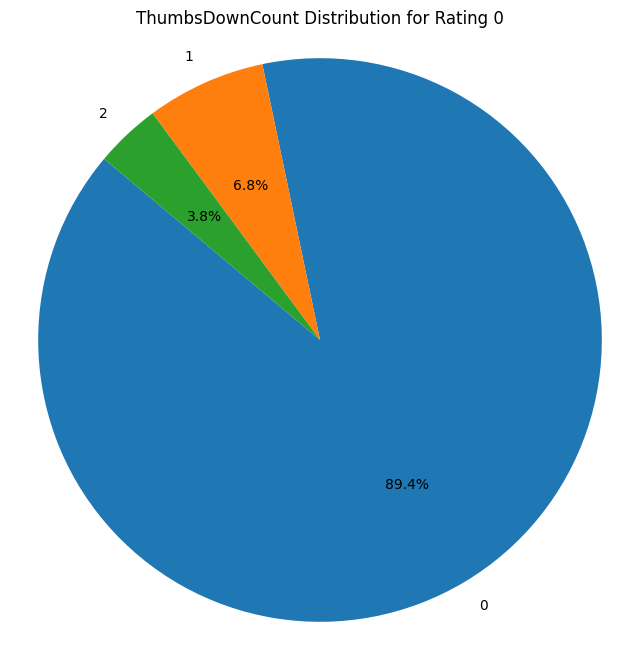

In [30]:
rating0_df = df[df['Rating'] == 0]
thumbs_down_counts = rating0_df['ThumbsDownCount'].value_counts()
filtered_counts = thumbs_down_counts[thumbs_down_counts >= 20]

plt.figure(figsize=(8, 8))
plt.pie(filtered_counts.values, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('ThumbsDownCount Distribution for Rating 0')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

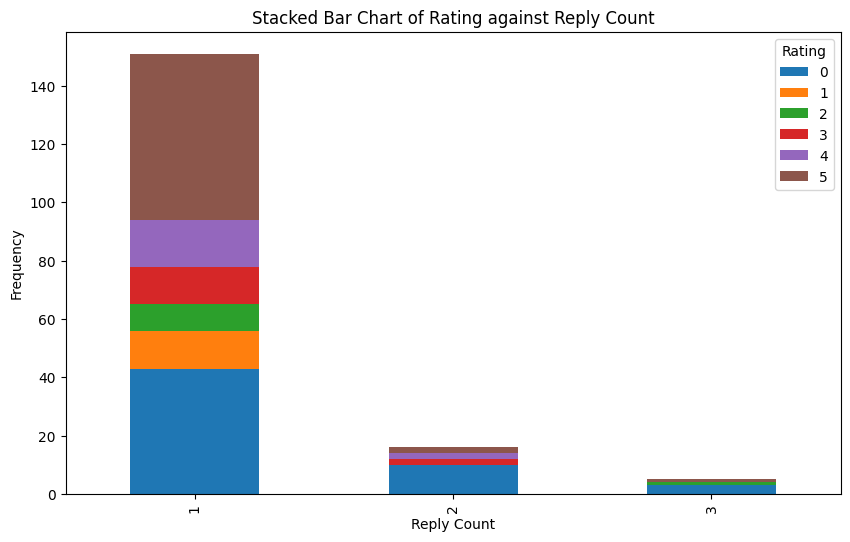

In [31]:
import matplotlib.pyplot as plt

# Filter out rows where 'ReplyCount' is greater than 0
filtered_df = df[df['ReplyCount'] > 0]

# Create a pivot table to count occurrences of each 'Rating' for each 'ReplyCount'
pivot_table = filtered_df.pivot_table(index='ReplyCount', columns='Rating', aggfunc='size', fill_value=0)

# Plotting the stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.xlabel('Reply Count')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Rating against Reply Count')


# Display the chart
plt.legend(title='Rating')
plt.show()


From the above stacked bar graph, I'm trying to see if there is any relation between `Reply Count` and `Rating`. I purposely omitted Reply Count = 1 as the frequency was very high and it affected my y-axis scale. My observations are:

- People are more likely to give Reviews/Comments when the Ratings are low than when the Ratings are high.
- Majority of the people decide not to leave a reply regardless of the Rating.

Hence, there *isn't* a clear relationship between `ReplyCount` and `Rating`

In [32]:
X_train.isna().sum()

ID                 0
RecipeNumber       0
ReplyCount         0
ThumbsUpCount      0
ThumbsDownCount    0
BestScore          0
Year               0
Day                0
dtype: int64

There are no NULL values for `X_train`

# 6. TF-IDF Vectorization (Omitted)

TF-IDF vectorization was done on `Recipe_Review` column. But this further readuced accuracy.

In [33]:
# Cleaning the data

# import spacy
# import nltk
# from nltk.corpus import stopwords
# import string
# import re

# stop_words = ['herself', 'this', 'can', 'yours', 'd', "she's", 'with', 'they', 'yourselves', 
# 'between', 'over', 'myself', 're', "that'll", 'so', 'of', 'nor', 'an', 'we', 'until',
# 'having', 'up', 'should', 'because', 'about', 'few', 'has', 'or', 'down', 'there', 'her', 
# 'being', 'here', 'below', "you'll", 'who', 'm', 'above', 'll', 'o', 've', 'by', 'their',
# 'themselves', 'me', 'before', 'whom', 'out', 'under', "it's", 'again', "you'd", 'have', 
# 'just', 'those', 'were', "you've", 'did', 's', 'through', 'himself', 'ours', 'some', 'in',
# 'be', 'no', 'own', 'which', 'hers', 'do', 'too', 'now', 't', 'same', 'he', 'all', 'will', 
# 'but', 'what', 'are', 'where', 'very', 'as', 'your', "should've", 'during', 'any', 'a', 'further',
# 'against', 'she', 'once', "you're", 'after', 'more', 'other', 'doing', 'ourselves', 'yourself', 
# 'on', 'his', 'our', 'the', 'itself', 'both', 'does', 'when', 'each', 'them', 'these', 'if', 'that',
# 'only', 'while', 'my', 'into', 'i', 'such', 'you', 'how', 'from', 'am', 'won', 'is', 'been', 'it',
# 'him', 'and', 'its', 'why', 'to', 'off', 'then', 'was', 'had', 'theirs', 'at', 'y', 'than', 'most', 'for']

# def remove_stopwords(text):
#     clean_text = []
#     for i in text:
#         if i not in stopwords:
#             clean_text.append(i.text)
#     return " ".join(clean_text)

# def preprocess(data):
#     # Fill missing values with an empty string
#     data = data.fillna('')
#     # Convert all values to strings
#     data = data.astype(str)
#     # removing everything except words
#     data =  data.str.replace("[^a-zA-Z#]", " ")
#     # removing words with length 2 and less
#     data = data.apply(lambda x: " ".join([i for i in x.split() if not len(i) <= 2 ]))
#     # lowercasing
#     data = data.apply(lambda x: x.lower())
#     # removing stopwords
#     data = data.apply(lambda x: remove_stopwords(x))
#     return data

# data_clean1 = preprocess(X_train['Recipe_Review'])
# data_clean2 = preprocess(X_test['Recipe_Review'])

To clean the data, I did the following:

- Replaced missing values with empty string
- Removed anything that was not a word (numbers, special characters, etc)
- Removed words with length < 2
- Removed Stopwords

In [34]:
#Applying TF-IDF Vectorization

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# tf = TfidfVectorizer(stop_words='english', max_features= 30, max_df = 0.5, smooth_idf = True)
# X_train_vec = tf.fit_transform(data_clean1)
# X_test_vec = tf.transform(data_clean2)
# X_train = X_train.drop("Recipe_Review", axis = 1)
# X_test = X_test.drop("Recipe_Review", axis = 1)
# X_train = np.hstack([X_train, X_train_vec.toarray()])
# X_test = np.hstack([X_test, X_test_vec.toarray()])
# # X_train = sc.fit_transform(X_train)
# # X_test = sc.fit_transform(X_test)
# X_train.shape, X_test.shape

I applied TF-IDF vectorization on the `Recipe_Review` column. After scaling, I added the TF-IDF vectors to my dataframe and limited the `max_features` to 30. However, this dropped by model accuracy. I also tried increasing my `max_features` to 50, 100 and 1000 - but the outcome remained unchanged.

In [35]:
# resampler = ImbPipeline(steps=[('o', SMOTE(sampling_strategy={2:350, 4:1300, 3:450}))])
# X_train, y_train = resampler.fit_resample(X_train, y_train)

To solve data imbalance across the `Rating` column, I tried to do oversampling and undersampling. But both lead to a *decrease* in overall accuracy.

## 7. Model Comparison

To compare the models, I will be comparing and evaluating 5 models - `LogisticRegression()`, `RandomForestClassifier`, `MLPClassifier`, `XGBClassifier()`, `VotingClassifier()` and `StackedClassifier()`  based on **Accuracy, Sensitivity** and `roc_auc_score`

## 7.1 Logistic Regression

Accuracy: 0.7606304985337243
Sensitivity (TPR) = 0.6666666666666666

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.33      0.02      0.03       254
           1       0.29      0.05      0.08        42
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00       248
           5       0.76      1.00      0.87      2075

    accuracy                           0.76      2728
   macro avg       0.23      0.18      0.16      2728
weighted avg       0.62      0.76      0.66      2728



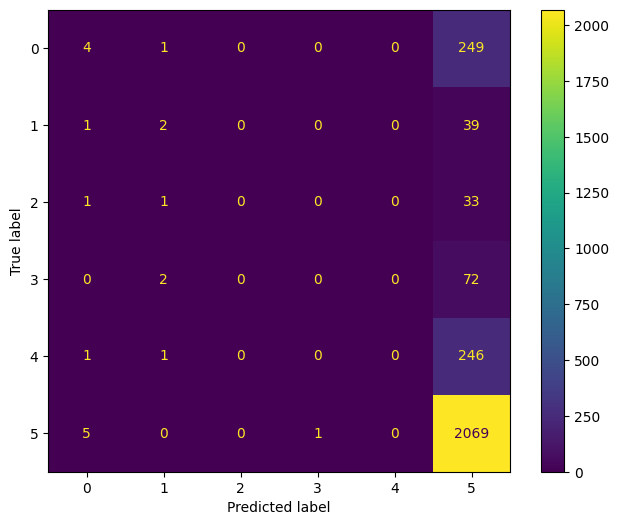

In [36]:
lr = LogisticRegression(max_iter=500)

lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred1)   # accuracy score
cm_lr = confusion_matrix(y_test, y_pred1) # Confusion matrix 
tpr_lr = cm_lr[1][1] /(cm_lr[1][0] + cm_lr[1][1])

print("Accuracy:",lr_acc)
print('Sensitivity (TPR) =', tpr_lr)


print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred1 ))

print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred1))

**Logsitic Regression:** Sensitivity is perfect but accuracy is a bit low.

## 7.2 Random Forest

Accuracy: 0.7620967741935484
Sensitivity (TPR) = 0.8333333333333334

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.33      0.02      0.03       254
           1       0.33      0.12      0.18        42
           2       0.00      0.00      0.00        35
           3       0.25      0.01      0.03        74
           4       0.00      0.00      0.00       248
           5       0.77      1.00      0.87      2075

    accuracy                           0.76      2728
   macro avg       0.28      0.19      0.18      2728
weighted avg       0.63      0.76      0.67      2728



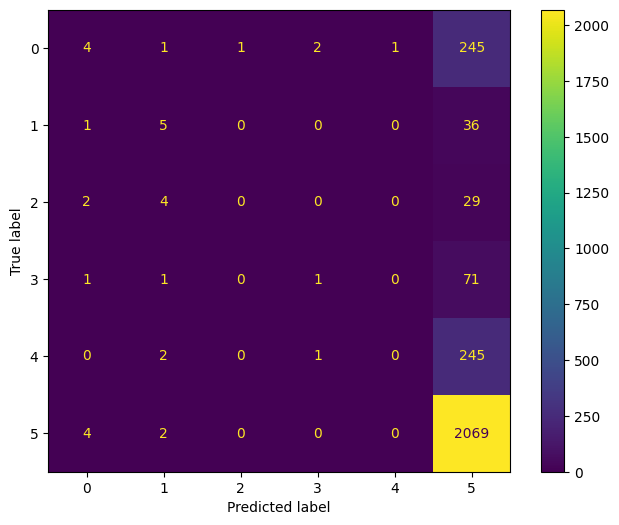

In [37]:
rand = RandomForestClassifier(n_estimators=300, max_depth=10)
rand.fit(X_train, y_train)
y_pred2 = rand.predict(X_test)

rand_acc = accuracy_score(y_test, y_pred2)   # accuracy score
cm_rand = confusion_matrix(y_test, y_pred2) # Confusion matrix 
tpr_rand = cm_rand[1][1] /(cm_rand[1][0] + cm_rand[1][1])

print("Accuracy:",rand_acc)
print('Sensitivity (TPR) =', tpr_rand)


print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred2))

print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred2))

**Random Forest:** Although the Accuracy is slightly better than that of Logistic Regression, the sensitivity has dropped

## 7.3 MLPClassifier

Accuracy: 0.6521260997067448
Sensitivity (TPR) = nan

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       254
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        74
           4       0.11      0.25      0.16       248
           5       0.78      0.83      0.81      2075

    accuracy                           0.65      2728
   macro avg       0.15      0.18      0.16      2728
weighted avg       0.61      0.65      0.63      2728



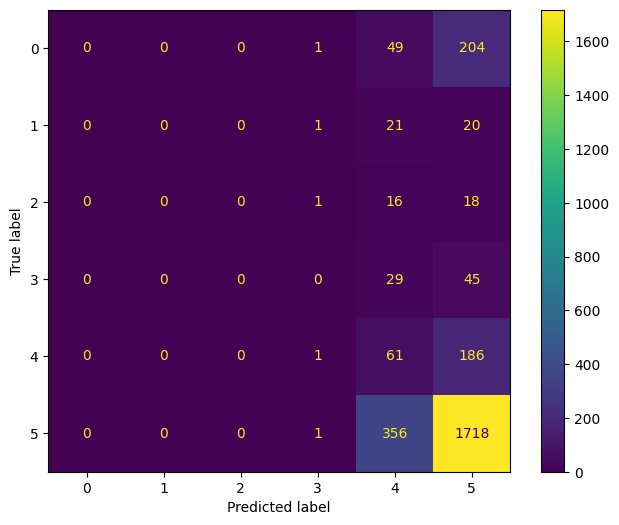

In [38]:
mlp = MLPClassifier(max_iter=300)
mlp.fit(X_train, y_train)
y_pred3 = mlp.predict(X_test)

mlp_acc = accuracy_score(y_test, y_pred3)   # accuracy score
cm_mlp = confusion_matrix(y_test, y_pred3) # Confusion matrix 
tpr_mlp = cm_mlp[1][1] /(cm_mlp[1][0] + cm_mlp[1][1])

print("Accuracy:", mlp_acc)
print('Sensitivity (TPR) =', tpr_mlp)


print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred3))

print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred3))

**MLPClassifier:** Similar performance to Logistic regression model

## 7.4 XGBClassifier

Accuracy: 0.7653958944281525
Sensitivity (TPR) = 0.7142857142857143

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.55      0.16      0.25       254
           1       0.45      0.12      0.19        42
           2       0.14      0.03      0.05        35
           3       0.23      0.04      0.07        74
           4       0.21      0.02      0.03       248
           5       0.78      0.98      0.87      2075

    accuracy                           0.77      2728
   macro avg       0.40      0.22      0.24      2728
weighted avg       0.68      0.77      0.69      2728



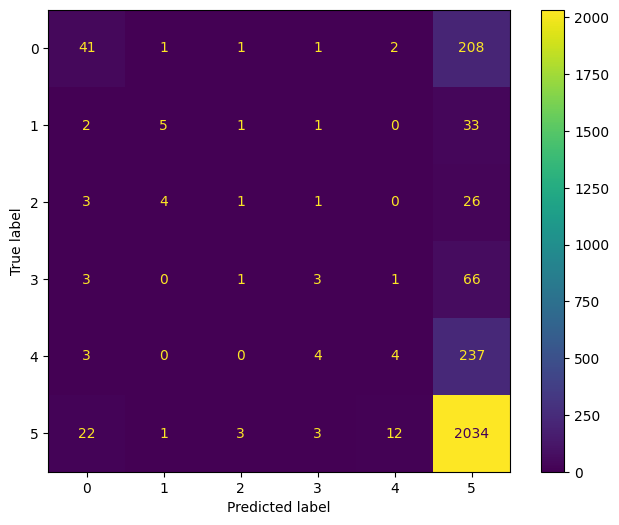

In [39]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred4 = xgb.predict(X_test)

xgb_acc = accuracy_score(y_test, y_pred4)   # accuracy score
cm_xgb = confusion_matrix(y_test, y_pred4) # Confusion matrix 
tpr_xgb = cm_xgb[1][1] /(cm_xgb[1][0] + cm_xgb[1][1])

print("Accuracy:", xgb_acc)
print('Sensitivity (TPR) =', tpr_xgb)


print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred4))

print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred4))

**XGBClassifier:** Much improved accuracy than all the other models but the sensitivity has dropped

## 7.5 Voting Classifier

Accuracy: 0.7683284457478006
Sensitivity (TPR) = 0.8333333333333334

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.64      0.14      0.23       254
           1       0.56      0.12      0.20        42
           2       0.00      0.00      0.00        35
           3       0.25      0.03      0.05        74
           4       0.23      0.01      0.02       248
           5       0.78      0.99      0.87      2075

    accuracy                           0.77      2728
   macro avg       0.41      0.21      0.23      2728
weighted avg       0.69      0.77      0.69      2728



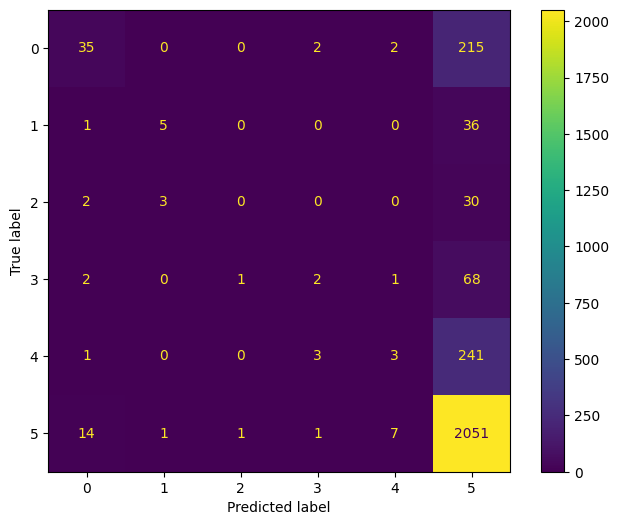

In [40]:
classifiers1 = [ ('xgb', XGBClassifier()),
                ('mlp', MLPClassifier()),
                ('rfc',  LogisticRegression()),
                ('etc', ExtraTreesClassifier())            
              ]

evc=VotingClassifier(estimators=classifiers1,voting='hard')
evc.fit(X_train, y_train)
y_pred5 = evc.predict(X_test)

evc_acc = accuracy_score(y_test, y_pred5)   # accuracy score
cm_evc = confusion_matrix(y_test, y_pred5) # Confusion matrix 
tpr_evc = cm_evc[1][1] /(cm_evc[1][0] + cm_evc[1][1])

print("Accuracy:", evc_acc)
print('Sensitivity (TPR) =', tpr_evc)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred5))

print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred5))

**Voting Classifier:** Better accuracy than all the previous models but sensitivity drops

## 7.6 Stacked Classifier

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.7683284457478006
Sensitivity (TPR) = 0.8333333333333334

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.64      0.14      0.23       254
           1       0.56      0.12      0.20        42
           2       0.00      0.00      0.00        35
           3       0.25      0.03      0.05        74
           4       0.23      0.01      0.02       248
           5       0.78      0.99      0.87      2075

    accuracy                           0.77      2728
   macro avg       0.41      0.21      0.23      2728
weighted avg       0.69      0.77      0.69      2728



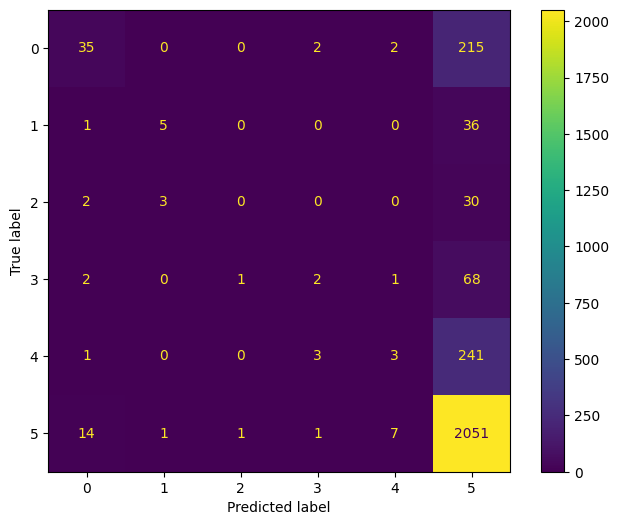

In [41]:
stk = StackingClassifier(estimators=classifiers1, 
                         final_estimator = RandomForestClassifier(),
                         stack_method = 'auto',
                         n_jobs = -1,
                         passthrough = True)

stk.fit(X_train, y_train)
y_pred6 = evc.predict(X_test)

stk_acc = accuracy_score(y_test, y_pred6)   # accuracy score
cm_stk = confusion_matrix(y_test, y_pred6) # Confusion matrix 
tpr_stk = cm_stk[1][1] /(cm_stk[1][0] + cm_stk[1][1])

print("Accuracy:", stk_acc)
print('Sensitivity (TPR) =', tpr_stk)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred6))

print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred6))

**Stacking Classifier:** Similar performance to stacking classifier

Accuracy: 0.718841642228739
Sensitivity (TPR) = 0.6923076923076923

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.40      0.28      0.33       254
           1       0.38      0.21      0.27        42
           2       0.12      0.06      0.08        35
           3       0.18      0.11      0.14        74
           4       0.17      0.11      0.14       248
           5       0.80      0.89      0.84      2075

    accuracy                           0.72      2728
   macro avg       0.34      0.28      0.30      2728
weighted avg       0.67      0.72      0.69      2728



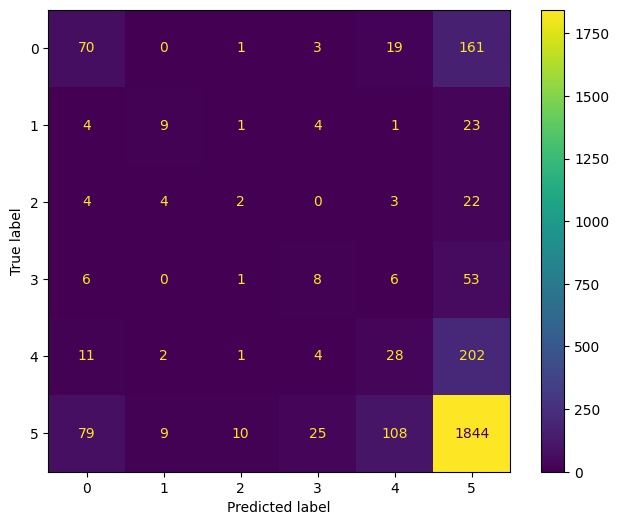

In [42]:
etc = ExtraTreesClassifier(n_estimators = 1000)
etc.fit(X_train, y_train)
y_pred7 = etc.predict(X_test)

etc_acc = accuracy_score(y_test, y_pred7)   # accuracy score
cm_etc = confusion_matrix(y_test, y_pred7) # Confusion matrix 
tpr_etc = cm_etc[1][1] /(cm_etc[1][0] + cm_etc[1][1])

print("Accuracy:", etc_acc)
print('Sensitivity (TPR) =', tpr_etc)


print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred7))

print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred7))

In [43]:
print(f"Logistic Regreesion: {stk_acc}")
print(f"Random Forest Classifier: {rand_acc}")
print(f"MLPClassifier: {mlp_acc}")
print(f"XGB Classifier: {xgb_acc}")
print(f"Extra Trees Classifier: {etc_acc}")
print(f"Voting Classifier: {evc_acc}")
print(f"Stacking Classifier: {stk_acc}")

Logistic Regreesion: 0.7683284457478006
Random Forest Classifier: 0.7620967741935484
MLPClassifier: 0.6521260997067448
XGB Classifier: 0.7653958944281525
Extra Trees Classifier: 0.718841642228739
Voting Classifier: 0.7683284457478006
Stacking Classifier: 0.7683284457478006


Looking at accuracy, **Voting and Stacking Classifiers** have the highest accuracy.

# 8. Model Comparison and Evaluation

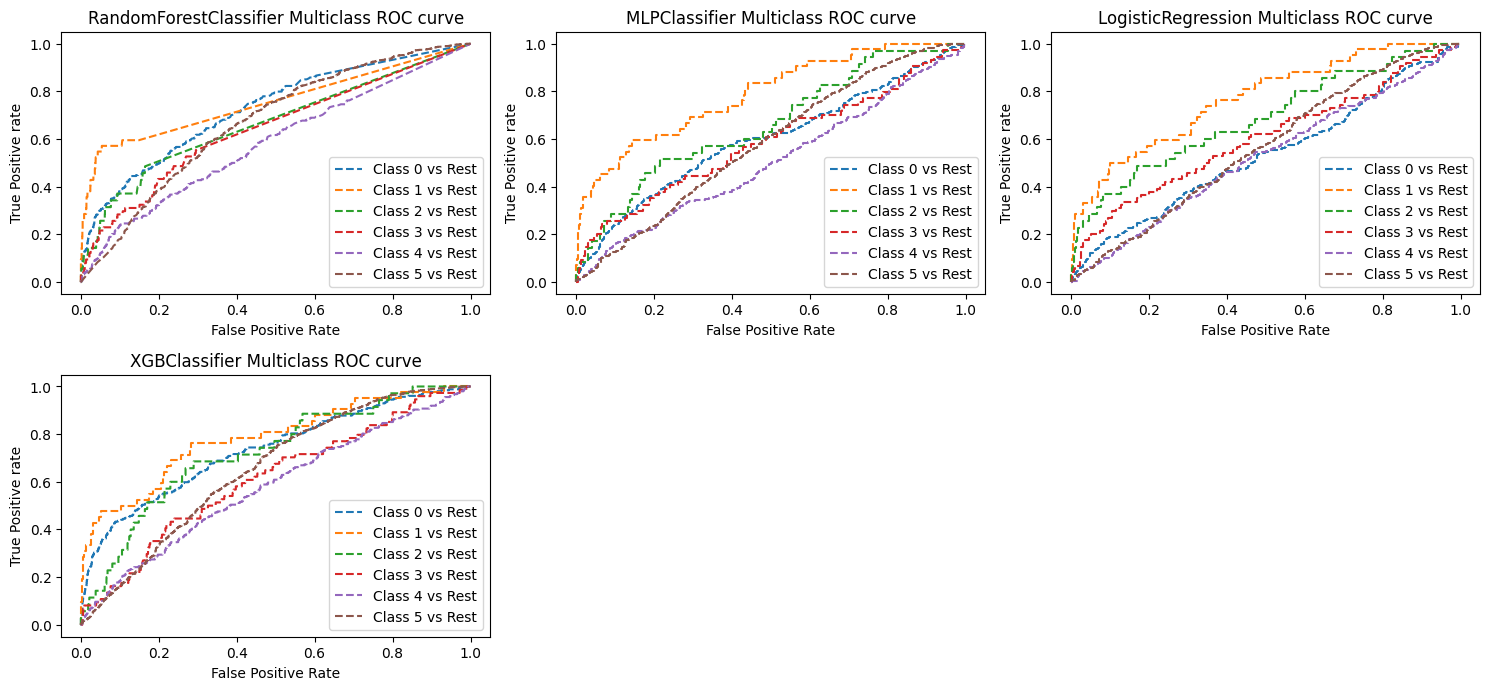

In [44]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
l = [[] for _ in range(4)]

models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'MLPClassifier': MLPClassifier(),
    'LogisticRegression': LogisticRegression(),
    'XGBClassifier':XGBClassifier()
}

n_class = 6
plt.figure(figsize=(15, 10))
cnt = 0

for idx, (name, model) in enumerate(models.items()):
    clf = OneVsRestClassifier(model)
    clf.fit(X_train, y_train)
    
    pred_proba = clf.predict_proba(X_test)
    
    
    plt.subplot(3, 3, idx+1)
    
    fpr = {}
    tpr = {}
    thresh = {}
    
    for i in range(n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test == i, pred_proba[:, i])
        scr = roc_auc_score(y_test==i, pred_proba[:, i], multi_class='ovr')
        l[cnt].append(scr)
        plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} vs Rest')
    cnt +=1
    plt.title(f'{name} Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')

model_df = pd.DataFrame({'RandomForestClassifier':l[0],
                    'MLPClassifier':l[1],
                    'LogisticRegression':l[2],
                    'XGBClassifier':l[3]
                   })
plt.tight_layout()
plt.show()

In [45]:
model_df

,RandomForestClassifier,MLPClassifier,LogisticRegression,XGBClassifier
0,0.726344,0.597061,0.533420,0.732818
1,0.755700,0.787026,0.769466,0.782036
2,0.668065,0.661652,0.684823,0.720752
3,0.644397,0.586473,0.601468,0.610883
4,0.585240,0.504788,0.523372,0.579186
5,0.670237,0.581534,0.563058,0.651768


After observing the `roc_auc_score` of the models across different Ratings, `XGBClassifier()` and `RandomForestClassifier` is able to distinguish labels for most Ratings.

- `XGBClassifier` classifies **Rating 0,1,2,3** well compared to other models
- `RandomForestClassifier` classifies **Rating 4 and 5** well compared to other models

# 9. Hyperparameter Tuning

Performed Hyperparameter tuning for 4 models - LogisticRegression, RandomForestClassifier, XGBClassifier and MLPClassifier. The following lines of code have been omitted as they take very long time to execute.

In [46]:
# log = LogisticRegression()

# log_param = {
#              'penalty' : ['l1', 'l2', None],
#              'solver' : ['lbfgs','liblinear','saga'],
#              'max_iter' : [100,500]
#             }

# grid_log = GridSearchCV(log, log_param , cv = 5, scoring = 'accuracy')
# grid_log = grid_log.fit(X_train, y_train)
# grid_log.best_params_

In [47]:
# xgb = XGBClassifier()

# xgb_param = {
#               'n_estimators': [100,500,1000],
#               'learning_rate': [0.01,0.05,0.1],
#               'gamma': [0, 0.5, 1],
#             }

# grid_xgb = GridSearchCV(xgb, xgb_param)
# grid_xgb = grid_xgb.fit(X_train, y_train)
# grid_xgb.best_params_

In [48]:
# rnd = RandomForestClassifier()

# rnd_param  = {
#               'bootstrap': [True],
#               'max_depth': [10,15],
#               'n_estimators': [100, 500, 1000]
#              }

# grid_rnd = GridSearchCV(rnd, rnd_param)
# grid_rnd = grid_rnd.fit(X_train, y_train)
# grid_rnd.best_params_

In [49]:
# mlp = MLPClassifier()

# mlp_param = {
#               'activation': ['relu', 'tanh', 'logistic'],
#               'solver': ['adam', 'sgd'],
#               'alpha': [0.0001, 0.001, 0.01],
#               'learning_rate': ['constant', 'adaptive'],
#               'max_iter' : [100,500]
#             }

# grid_mlp = GridSearchCV(mlp, mlp_param)
# grid_mlp = grid_mlp.fit(X_train, y_train)
# grid_mlp.best_params_

# 10. Final Model - Stacked Classifier

In [50]:
kf = StratifiedKFold(shuffle=True, n_splits=5) 

MAX_ITER = 100
RANDOM_STATE = 42

#Base Classifiers for Voting Classifier
classifiers1 = [ ('xgb', XGBClassifier()),
                 ('mlp', MLPClassifier()),
                 ('rfc',  LogisticRegression()),
                 ('etc', ExtraTreesClassifier()) 
               ]


clf_xgb = XGBClassifier(gamma = 0.1,
                        learning_rate = 0.1,
                        objective = 'multi:softmax',
                        random_state = RANDOM_STATE)



clf_log = LogisticRegression(max_iter =  MAX_ITER,
                             penalty =  'l1',
                             multi_class ='ovr',
                             solver =  'liblinear',
                             class_weight = 'balanced',
                             random_state = RANDOM_STATE)

clf_mlp = MLPClassifier(activation = "logistic", 
                        alpha = 0.0001, 
                        hidden_layer_sizes = (10,10,10),
                        learning_rate = "constant",
                        solver = 'adam',
                        max_iter = 500,
                        random_state = RANDOM_STATE)


clf_vc = VotingClassifier(estimators=classifiers1,voting='soft')

#Meta-Classifier
clf_rfc = RandomForestClassifier(n_estimators = 1000,
                                criterion = "log_loss", 
                                max_depth = 15,
                                max_features = "sqrt",
                                n_jobs = -1,
                                 bootstrap = True,
                                random_state = RANDOM_STATE)

clf_etc = ExtraTreesClassifier(n_estimators = MAX_ITER,
                               max_features = 'auto',
                               random_state = RANDOM_STATE)

#Base Models
classifiers = [ ('xgb', clf_xgb),
                ('mlp', clf_mlp),
                ('rfc', clf_log),
                ('etc', clf_etc),
                ('vc', clf_vc)
              ]

#Stacked Classifier            
model = StackingClassifier(estimators = classifiers, 
                         final_estimator = clf_rfc,
                         stack_method = 'auto',
                         n_jobs = -1,
                         cv = kf,
                         passthrough = True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))
print("Accuracy score: ", accuracy_score(y_pred, y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

              precision    recall  f1-score   support

           0       0.17      0.56      0.27        78
           1       0.19      0.36      0.25        22
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         7
           4       0.00      0.50      0.01         2
           5       0.99      0.78      0.87      2619

    accuracy                           0.77      2728
   macro avg       0.23      0.37      0.23      2728
weighted avg       0.95      0.77      0.85      2728

Accuracy score:  0.7694281524926686


In [51]:
model

StackingClassifier(cv=StratifiedKFold(n_splits=5,
        random_state=RandomState(MT19937) at 0x7E5333BBD340, shuffle=True),
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_type...
                                                                            monotone_constraints=None,
                                                                            multi_strategy=None,
                                                                            n_estimators=None,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            random_state=None, ...)),
                                                             ('mlp',
                                                              MLPClassifier()),
                                                             ('rfc',
                                                              LogisticRegression()),
                                                             ('etc',
                                                              ExtraTreesClassifier())],
                                                 voting='soft'))],
                   final_estimator=RandomForestClassifier(criterion='log_loss',
                                                          max_depth=15,
                                                          n_estimators=1000,
                                                          n_jobs=-1,
                                                          random_state=42),
                   n_jobs=-1, passthrough=True)

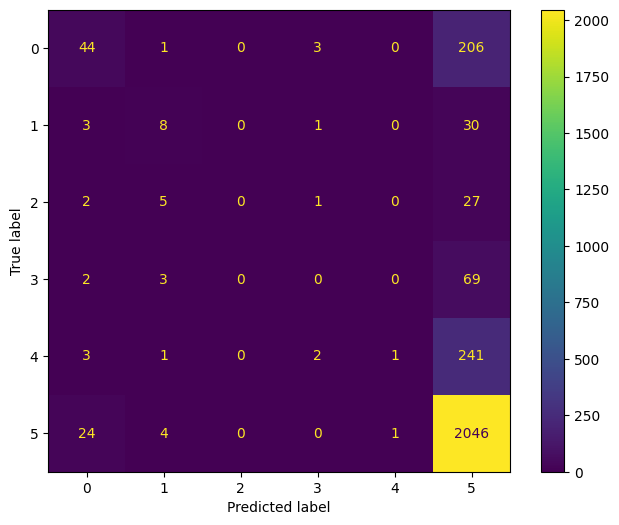

In [52]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred)) 

# 11. Saving Results

In [53]:
#Creating ID column and keeping all predictions in Rating column
rub = pd.DataFrame({'ID': [x for x in range(1,4547)]})
rub["Rating"] = model.predict(test)
rub.to_csv("/kaggle/working/sample.csv",index=False)